In [1]:
import sys
sys.path.append('../../')
from processingNetwork.ProcessingNetwork import ProcessingNetwork
from processingNetwork.ProcessingNode import ProcessingNode


# Data Processing Example
## 1 First we will generate some data we want to process

In [2]:
import numpy as np
data = np.random.rand(150,1)
#data

## 2. We create some processing steps for the 5 point moving average of the data points.

In [44]:
class MovingAverage(ProcessingNode):
    
    def do_input(self,feature,context):
        point =  feature['point']
        if not 'past_number' in context:
            context['past_number'] = point
        context['past_number'] = 0.9*context['past_number'] + point*0.1
        return context['past_number']
    


In [48]:
class PointBuffer(ProcessingNode):

    def do_input(self,feature,context):
        # Do some work
        #print(context['points'])
        #context['points'] = context['points'] + 1
        return {'data':feature['point'],'test':1}
        


## 3. Create a two node network

In [49]:
p_def = {}

p_def['PointBuffer']= {'name':'PointBuffer', 
             'type': PointBuffer,
             'settings':{'points':10, 'input':'number'}, ######## NOTE: Setting points to 10
             'dependencies':{'input':{'point':['__ref','point_in']}}}

p_def['MovingAverage']= {'name':'MovingAverage', 
             'type': MovingAverage,
             'settings':{},
             'dependencies':{'input':{'point':['__ref','PointBuffer','data']}}}

pn = ProcessingNetwork(p_def)


## 4. Process the points

In [50]:
features = []
for p in data:
    feature = {'point_in' : p[0]}
    feature = pn.process(feature)
    features.append(feature)
print(len(features))

150


In [43]:
features

[{'point_in': 0.8064655348724971,
  'PointBuffer': {'data': 0.8064655348724971, 'test': 1},
  'MovingAverage': 0.8064655348724971},
 {'point_in': 0.2844901201888905,
  'PointBuffer': {'data': 0.2844901201888905, 'test': 1},
  'MovingAverage': 0.7542679934041364},
 {'point_in': 0.16434020337797928,
  'PointBuffer': {'data': 0.16434020337797928, 'test': 1},
  'MovingAverage': 0.6952752144015207},
 {'point_in': 0.33659012468224914,
  'PointBuffer': {'data': 0.33659012468224914, 'test': 1},
  'MovingAverage': 0.6594067054295936},
 {'point_in': 0.917641673936796,
  'PointBuffer': {'data': 0.917641673936796, 'test': 1},
  'MovingAverage': 0.6852302022803138},
 {'point_in': 0.598416111108424,
  'PointBuffer': {'data': 0.598416111108424, 'test': 1},
  'MovingAverage': 0.6765487931631249},
 {'point_in': 0.5233571053606494,
  'PointBuffer': {'data': 0.5233571053606494, 'test': 1},
  'MovingAverage': 0.6612296243828774},
 {'point_in': 0.800027631809141,
  'PointBuffer': {'data': 0.800027631809141

## 5. Visualize

In [37]:
import pandas as pd
df = pd.DataFrame(features)
display(df)

,MovingAverage,PointBuffer,point_in
0,0.806466,0.806466,0.806466
1,0.754268,0.284490,0.284490
2,0.695275,0.164340,0.164340
3,0.659407,0.336590,0.336590
4,0.685230,0.917642,0.917642
5,0.676549,0.598416,0.598416
6,0.661230,0.523357,0.523357
7,0.675109,0.800028,0.800028
8,0.690080,0.824818,0.824818
9,0.622511,0.014387,0.014387


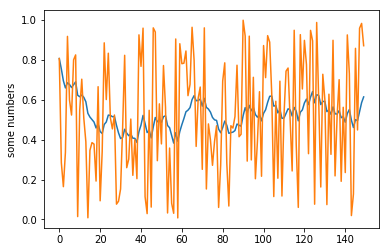

In [38]:
import matplotlib.pyplot as plt
plt.plot(df['MovingAverage'])
plt.plot(df['PointBuffer'])

plt.ylabel('some numbers')
plt.show()

# 6. Reconfigure as needed:

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


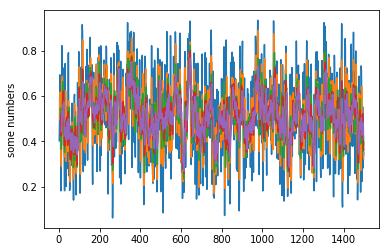

In [94]:
p_def = {}

for i in range(5,30,5):

    si = str(i)
    p_def['PointBuffer'+ str(i)]= {'name':'PointBuffer'+ str(i), 
                 'type': PointBuffer,
                 'settings':{'points':i, 'input':'number'}, ######## NOTE: Setting points to 10
                 'dependencies':[]}


    p_def['MovingAverage'+ str(i)]= {'name':'MovingAverage'+ str(i), 
                 'type': MovingAverage,
                 'settings':{},
                 'dependencies':['PointBuffer'+ str(i)]}


pn = ProcessingNetwork(p_def)

features = []
for p in data:
    feature = {'number' : p[0]}
    feature = pn.process(feature)
    features.append(feature)

df = pd.DataFrame(features)

for i in  range(5,30,5):
    plt.plot(df['MovingAverage'+ str(i)])

plt.ylabel('some numbers')
plt.show()